In [ ]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

'''
https://crossincode.com/vip/homework_list/?cid=11
数据可视化小组

利用 matplotlib 分析**租房数据并制作可视化图表
https://crossincode.com/vip/homework/182/

'''

##  任务1，  读取 CSV 格式文件“task_2_lianjia_data.csv”，将数据命名为 lianjia_data，并选取前部数据查看(阅读 参考文章 1、2);

In [3]:
#导入pandas库，用于整理数据，并作建单的图表
import pandas as pd

#导入matplotlib库
import matplotlib

#导入pyplot模块
import matplotlib.pyplot as plt

#识别图表中的中文字符
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False



# 任务1. 读取 CSV 格式文件“task_2_lianjia_data.csv”，将数据命名为 lianjia_data，并选取前部数据查看(阅读 参考文章 1、2);
'''
参考文章：
Pandas 读取 CSV 文件的方法(取方法一) 
    https://www.jb51.net/article/174136.htm
Pandas 库之 DataFrame 使用的学习笔记 
    https://www.jb51.net/article/163636.htm
'''
# 读取CSV文件“task_2_lianjia_data.csv”

file_path="./task_2_lianjia_data.csv"
f = open(file_path,encoding="utf-8") 
lianjia_data = pd.read_csv(f)

# 显示链家数据
lianjia_data.head()

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"
2,整租·长桥三村 2室1厅 南,徐汇,长桥,长桥三村,51,南,2室1厅1卫,高楼层,6,随时看房
3,整租·东湾小区 1室1厅 南,徐汇,华泾,东湾小区,47,南,1室1厅1卫,中楼层,6,随时看房
4,整租·花苑村紫竹园 1室1厅 南,徐汇,康健,花苑村紫竹园,42,南,1室1厅1卫,高楼层,6,随时看房


## 任务2，  利用 groupby 函数，以【面积大小(m²)】字段进行 groupby，统计各个面积下的【房源数量】情况(阅读参考 文章 3、4);

In [4]:
# 任务2 利用 groupby 函数，以【面积大小(m²)】字段进行 groupby，统计各个面积下的【房源数量】情况(阅读参考 文章 3、4);
'''
参考文章：
DataFrame 对象 groupby.agg 方法总结
【例如:df1 = df.groupby("列名 A")["列名 B"].agg({"新列名": "count/mean/sum"})，
表示根据 A 列进行 groupby，选择 B 列进行其他操作，agg 主要是统计归属于某一类的数量/ 平均值/总量等】 
    https://blog.csdn.net/miaogegegege/article/details/83450256

pandas group 分组与 agg 聚合 
    https://blog.csdn.net/u012706792/article/details/80892510
'''
# 下面这句会报错：FutureWarning: using a dict on a Series for aggregation is deprecated and will be removed in a future version
# lianjia_squre = lianjia_data.groupby("面积大小（㎡）")["简介（方式·小区名 户型 朝向）"].agg({"房源数量": "count"})
# lianjia_squre.head()

# 参考 https://blog.csdn.net/genius0182/article/details/81368948 修改如下：

lianjia_squre = lianjia_data.groupby("面积大小（㎡）")["简介（方式·小区名 户型 朝向）"].agg("count")
lianjia_squre = lianjia_squre.to_frame()  
lianjia_squre.columns = ['房源数量']
lianjia_squre.head()

,房源数量
面积大小（㎡）,
7,1
9,3
10,1
11,1
12,1


# 任务3，  将第（2）问所统计数据，作折线图和条形图，并得出相关结论

[7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 108, 109, 110, 111, 113, 116, 118, 121, 123, 125, 126, 128, 129, 130, 131, 133, 137, 139, 143, 145, 151, 152, 155, 162, 171, 172]
[1, 3, 1, 1, 1, 1, 2, 5, 4, 1, 4, 1, 7, 2, 4, 4, 4, 6, 3, 7, 12, 16, 37, 11, 19, 21, 29, 38, 24, 18, 24, 11, 9, 22, 20, 15, 8, 16, 15, 10, 17, 9, 14, 10, 17, 8, 9, 10, 6, 3, 4, 3, 8, 9, 6, 5, 6, 3, 7, 2, 5, 4, 5, 4, 2, 3, 3, 2, 4, 2, 3, 3, 6, 3, 2, 1, 2, 1, 2, 2, 6, 4, 7, 3, 5, 2, 3, 9, 4, 2, 4, 3, 2, 2, 1, 4, 4, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


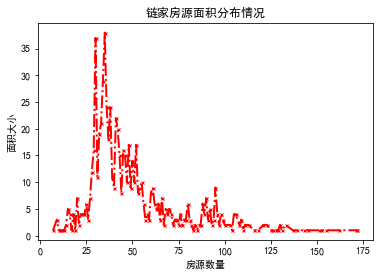

In [5]:
# 将第(2)问所统计数据，作折线图和条形图，并得出相关结论(阅读参考文章 5、6)，
# 提示:先提取第(2)问 所得数据表的 index 索引，饼转化成 list;再提取【房源数量】的值转成 list(阅读参考文章 7、8);
'''
参考文章：
折线图 plt.plot() 参数详解 
    https://blog.csdn.net/sinat_36219858/article/details/79800460
条形图 plt.bar() 参数详解 
    https://blog.csdn.net/liangzuojiayi/article/details/78187704
python 获取 dataframe 的 index 
    https://blog.csdn.net/qq_43522113/article/details/83538383
如何把 pandas dataframe 对象或 series 对象转换成 
    list https://blog.csdn.net/weixin_42613703/article/details/85219172
'''
lianjia_squre_index = lianjia_squre.index.tolist()
print(lianjia_squre_index)


# 提取lianjia_squre【房源数量】的数据值，命名为lianjia_count，用作纵坐标值
lianjia_squre_count = lianjia_squre["房源数量"].values.tolist()
print(lianjia_squre_count)

# 调用plt，作趋势图（即折线图）
# plt.plot（横坐标数值，纵坐标数值，线的类型，颜色，线宽，标记点类型，标记大小）
plt.plot(lianjia_squre_index,lianjia_squre_count,'-.',  color='r',linewidth=2, marker='x',markersize=3)

# 设置图片标题
plt.title("链家房源面积分布情况")
# 设置图片横轴标签
plt.xlabel("房源数量")
# 设置图片纵轴标签
plt.ylabel("面积大小")
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

# 保存图片为
plt.savefig("plot.png")

# 展示图片
plt.show()

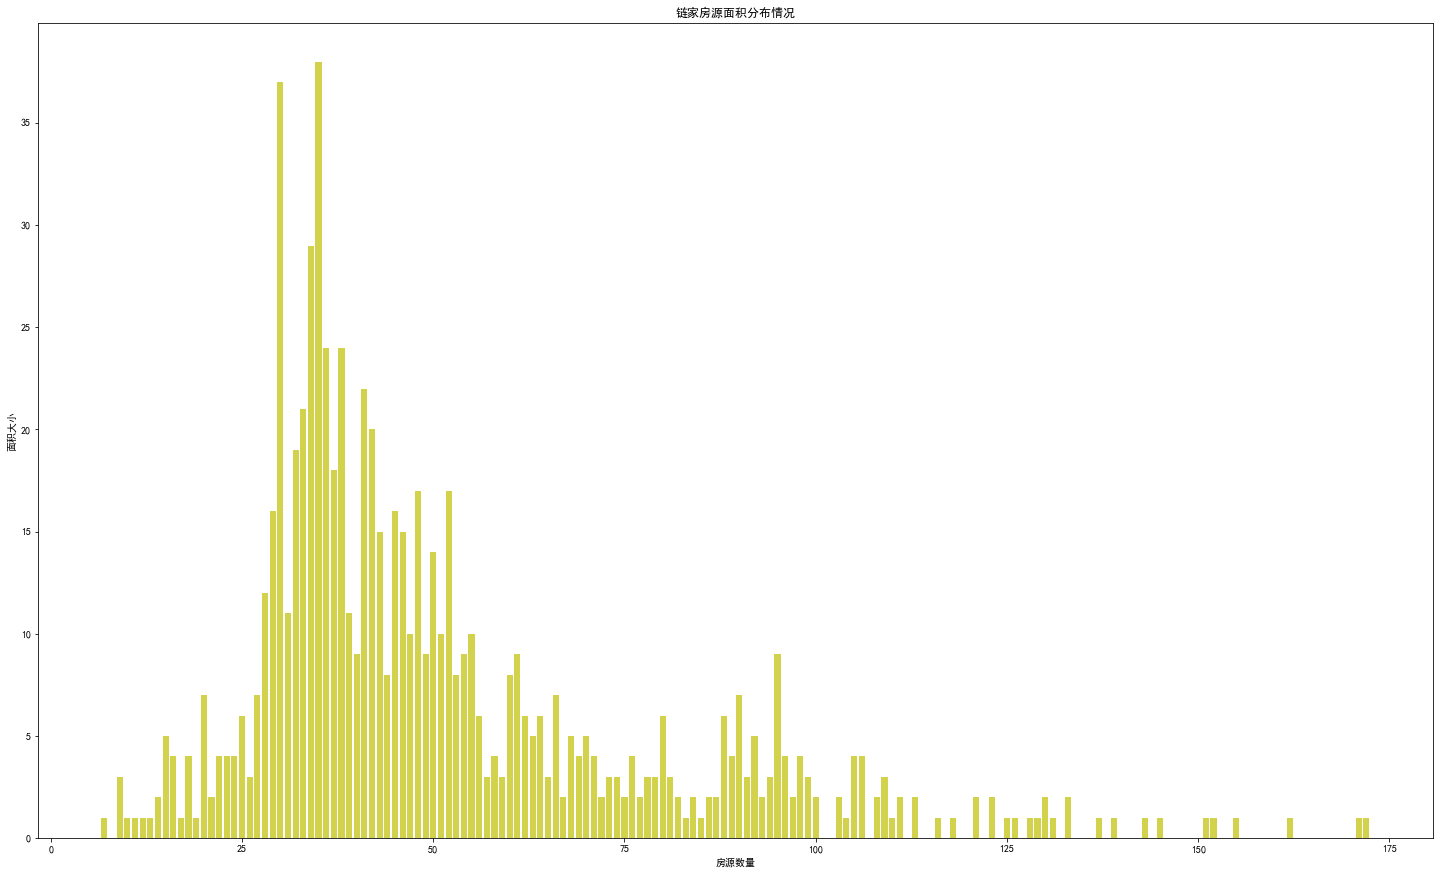

In [4]:
# 调用plt，作条形图
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
# plt.bar(lianjia_squre_index,lianjia_count,align="center",color="r",alpha=0.7)
plt.bar(lianjia_squre_index,lianjia_squre_count,align="center",color="y",alpha=0.7)

# 设置图片标题
plt.title("链家房源面积分布情况")
# 设置图片横轴标签
plt.xlabel("房源数量")
# 设置图片纵轴标签
plt.ylabel("面积大小")
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

# 保存图片为
plt.savefig("bar.png")

# 展示图片
plt.show()

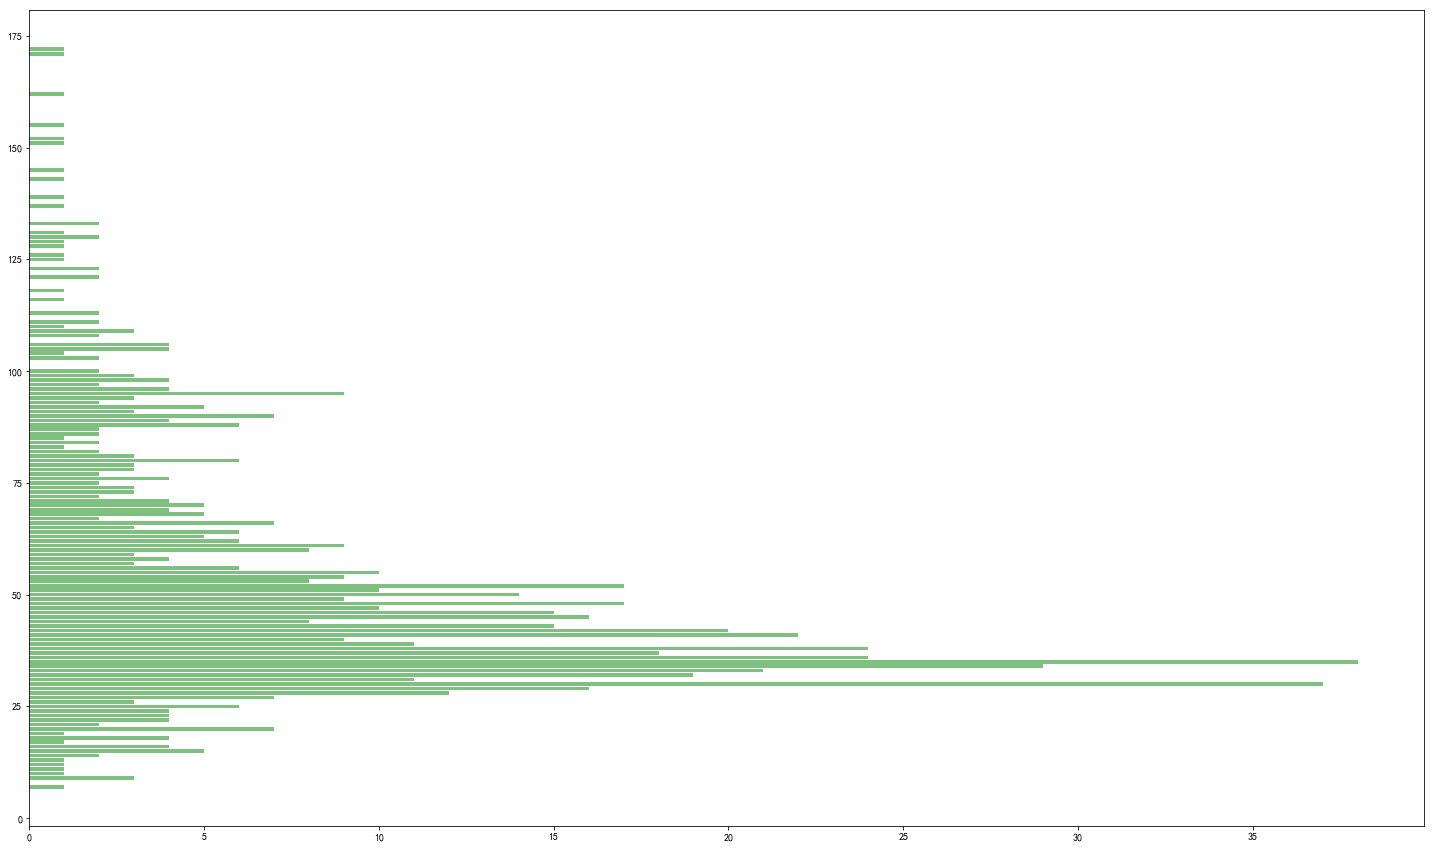

In [5]:
# barh为横条形图
plt.barh(lianjia_squre_index,lianjia_squre_count,align="center",color="g",alpha=0.5)
# 保存图片
plt.savefig("barh.png")
# 展示图片
plt.show()

### 【结论】链家所出租的房屋面积多集中在25-50㎡阶段

## 任务4，  利用 groupby 函数，以【区】字段进行 groupby，统计各个上海各个“区”所属的【房源数量】情况;

In [6]:
# 以“区”字段进行groupby，统计各个区域的【房源数量】
# lianjia_district=lianjia_data.groupby("区")["简介（方式·小区名 户型 朝向）"].agg({"房源数量": "count"}).sort_values(by="房源数量")
# lianjia_district

lianjia_district = lianjia_data.groupby("区")["简介（方式·小区名 户型 朝向）"].agg("count")
lianjia_district = lianjia_district.to_frame()  
lianjia_district.columns = ['房源数量']
lianjia_district = lianjia_district.sort_values(by="房源数量")
lianjia_district

,房源数量
区,
奉贤,1
嘉定,6
青浦,10
普陀,22
虹口,24
松江,45
杨浦,56
黄浦,76
长宁,86


## 任务5，  将第(4)中所统计数据，作条形图，并得出相关结论;

['奉贤', '嘉定', '青浦', '普陀', '虹口', '松江', '杨浦', '黄浦', '长宁', '闵行', '浦东', '静安', '徐汇']
[1, 6, 10, 22, 24, 45, 56, 76, 86, 86, 106, 108, 126]


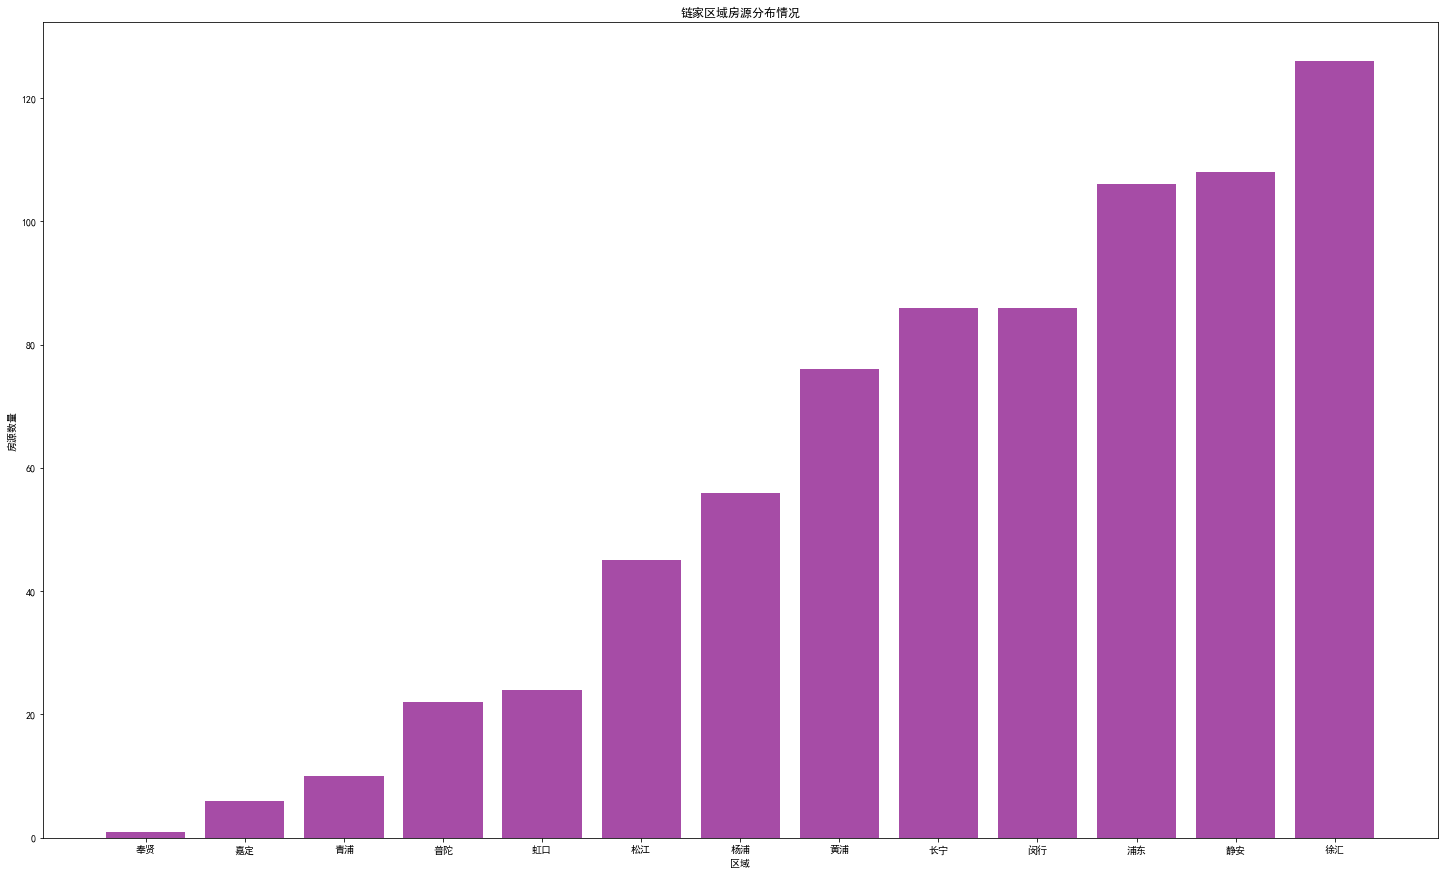

In [9]:


# NameError: name 'arange' is not defined， 
from pylab import *

# 提取lianjia_district_DataFrame的索引，用作横坐标值
lianjia_district_index = lianjia_district.index.tolist()
print(lianjia_district_index)

# 提取lianjia_squre_DataFrame的【房源数量】的值，即lianjia_district,用作纵坐标值
lianjia_district_count = lianjia_district["房源数量"].values.tolist()
print(lianjia_district_count)

# 调用plt，作条形图
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
# plt.bar(lianjia_district_index,lianjia_district_count,align="center",color="purple",alpha=0.7)

# matplotlib bar柱形图x轴不按顺序排列的问题   https://www.jianshu.com/p/64c34e21a5e1
plt.xticks(arange(len(lianjia_district_index)), lianjia_district_index)
plt.bar(arange(len(lianjia_district_index)),lianjia_district_count,align="center",color="purple",alpha=0.7)

# 设置图片标题
plt.title("链家区域房源分布情况")
# 设置图片横轴标签
plt.xlabel("区域")
# 设置图片纵轴标签
plt.ylabel("房源数量")
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

# 保存图片为
plt.savefig("bar_2.png")

# 展示图片
plt.show()

### 【结论】徐汇区房源数量最多，奉贤区最少

##  任务6， 利用 groupby 函数，以【楼层类型】字段进行 groupby，统计各个楼层所属的【房源数量】情况;

In [11]:
# 第(6)问所统计数据，作饼图(阅读参考文章 9)，并得出相关结论。
'''
参考文章：
python 画图--饼图 
    https://blog.csdn.net/jenyzhang/article/details/52047999
'''

lianjia_floor = lianjia_data.groupby("楼层类型")["简介（方式·小区名 户型 朝向）"].agg("count")
lianjia_floor = lianjia_floor.to_frame()  
lianjia_floor.columns = ['房源数量']
lianjia_floor


,房源数量
楼层类型,
中楼层,231
低楼层,146
地下室,5
高楼层,370


['中楼层', '低楼层', '地下室', '高楼层']
[231, 146, 5, 370]


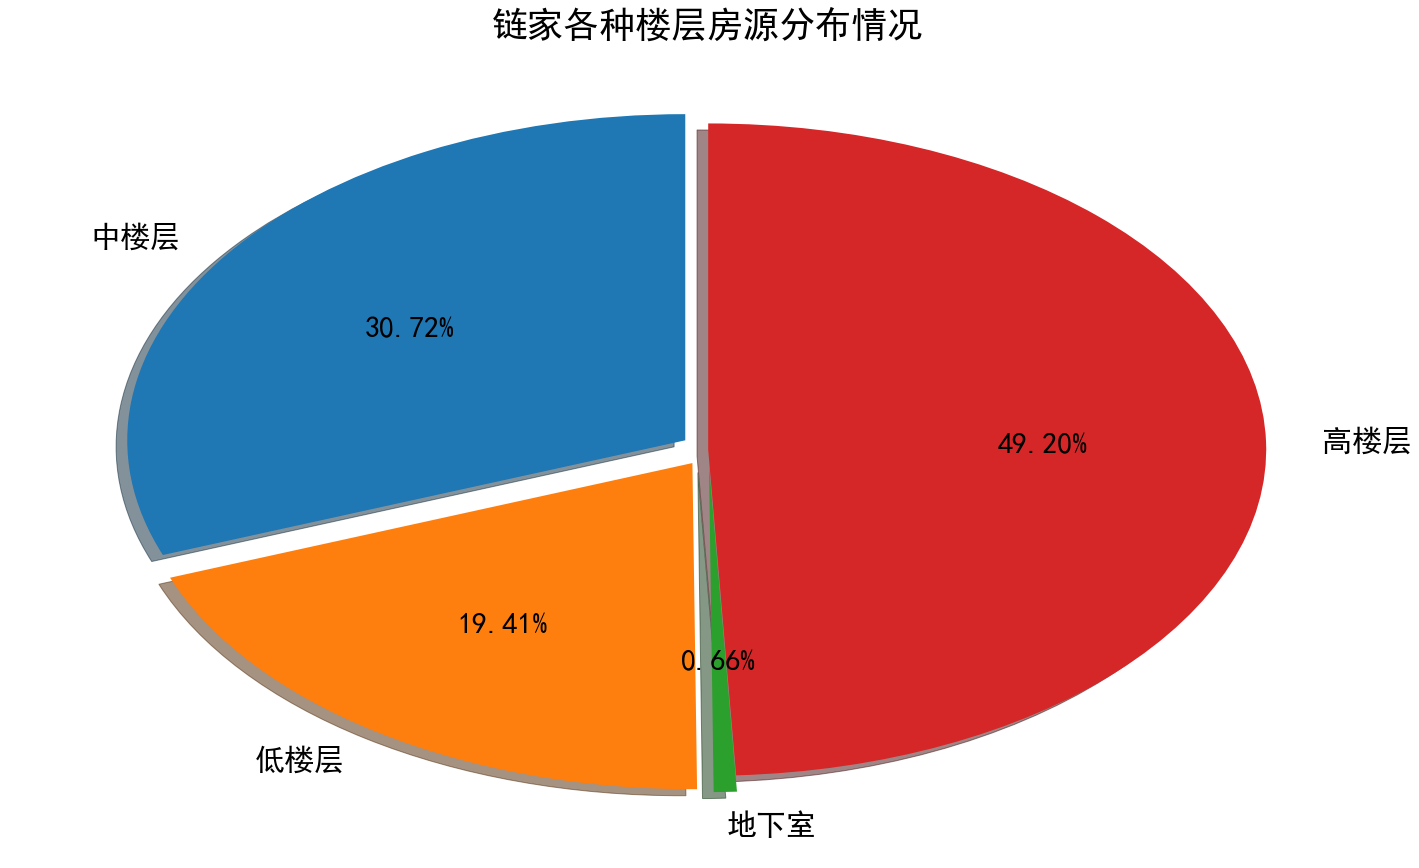

In [15]:
# 提取lianjia_floor_DataFrame的索引，用作横坐标值
lianjia_floor_index = lianjia_floor.index.tolist()
# 有空格，去掉
lianjia_floor_index=[x.strip() for x in lianjia_floor_index]
print(lianjia_floor_index)


# 提取lianjia_floor_DataFrame的【房源数量】的值，即llianjia_floor,用作纵坐标值
lianjia_floor_count = lianjia_floor["房源数量"].values.tolist()
print(lianjia_floor_count)

# 调用plt，作饼图
# plt.pie（数值，数值的标签，百分比，开始位置）
# plt.pie(lianjia_floor_count,labels=lianjia_floor_index, labeldistance = 1.1, autopct="%.2f%%",startangle=90, shadow = True)

explode = (0.05,0.05,0.05,0)

matplotlib.rcParams.update({'font.size': 30}) # 改变所有字体大小，改变其他性质类似

plt.pie(lianjia_floor_count,explode=explode, labels=lianjia_floor_index, labeldistance = 1.1, autopct="%.2f%%",startangle=90, shadow = True)


# 设置图片标题
plt.title("链家各种楼层房源分布情况")
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig("pie.png")

# 展示图片
plt.show()

### 【结论】高楼层源数量最多，地下室最少